In [2]:
import scipy.integrate as inte 
import numpy as np 
import math 
import matplotlib.pyplot as plt

<ErrorbarContainer object of 3 artists>

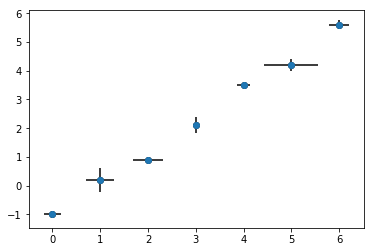

In [3]:
x = np.array([0, 1, 2, 3, 4, 5, 6])
y = np.array([-1, 0.2, 0.9, 2.1, 3.5, 4.2, 5.6])
x_err=np.random.normal(0,0.3,len(x))  #(media,sigma,numero de datos)
y_err=np.random.normal(0,0.4,len(y))
plt.plot(x,y,'o',color='black')
plt.errorbar(x,y,yerr=y_err,xerr=x_err, fmt='o',ecolor='black')

In [45]:
def modelo(x,a,b):   #se define una funcion y que depende de las variables x,a,b
    return a*x+b    #se escribe la forma de la funcion

In [46]:
def chicuad(a,b):
    chi = (((y-modelo(x,a,b))**2)/y_err**2).sum() 
    return chi

In [65]:
a0 = 0.3
b0 = 0.1
ancho_a = 0.07
ancho_b = 0.05
puntos = 10000
alist=[]
blist=[]
alist.append(a0) # agrega un solo elemento al final de la lista. Error común: no devuelve la nueva lista, simplemente modifica el original.
blist.append(b0)
aceptados=0

In [73]:
for a in range(puntos):
    olda0=alist[-1]
    oldb0=blist[-1]
    newpoint1=np.random.normal(olda0,ancho_a)
    newpoint2=np.random.normal(oldb0,ancho_b)
#  print "nuevo punto=",newpoint1,newpoint2
    ratio=chicuad(olda0,oldb0)-chicuad(newpoint1,newpoint2)
#    print ("radio=",ratio)
    if ratio > 0:
        alist.append(newpoint1)
        blist.append(newpoint2)
        aceptados+=1
    else:
        e=math.exp(ratio/2)
        ale=np.random.uniform(0.0,1.0)
        if e > ale:
            alist.append(newpoint1)
            blist.append(newpoint2)
            aceptados+=1
        else:
            alist.append(olda0)
            blist.append(oldb0)

totales=puntos

In [74]:
print ("aceptados=",aceptados,"totales=",totales)

aceptados= 5281 totales= 10000


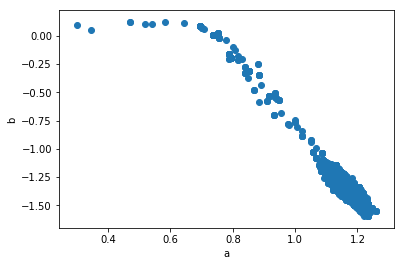

In [75]:
plt.scatter(alist,blist)
plt.xlabel('a')
plt.ylabel('b')
plt.show()

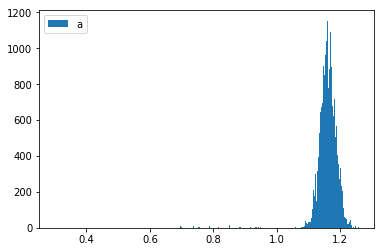

In [76]:
plt.hist(alist,500, label = 'a', linewidth=2)
plt.legend()
plt.show()

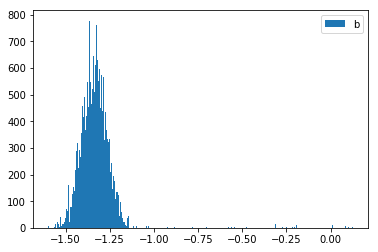

In [77]:
plt.hist(blist,500, label='b', linewidth=2)
plt.legend()
plt.show()